In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import pandas as pd

def visualize_graph_from_file(file_path, metrics_to_plot, statistics_to_plot):
    """
    Visualizza un grafo 3D con Matplotlib, colorando i nodi in base alla statistica selezionata.

    :param file_path: Percorso del file CSV contenente i dati.
    :param metrics_to_plot: Lista delle metriche da visualizzare (ad esempio ['closeness', 'degree']).
    :param statistics_to_plot: Lista delle statistiche da visualizzare (ad esempio ['Mean', 'Median']).
    """
    # Leggi il file CSV
    data = pd.read_csv(file_path)

    # Estrai nodi unici e metriche uniche
    nodes = data['Node'].unique()
    metrics = data['Metric'].unique()

    # Funzione per creare il grafo e assegnare le metriche come attributi dei nodi
    def create_graph_with_metrics(data):
        G = nx.Graph()

        for node in nodes:
            node_data = data[data['Node'] == node]
            node_metrics = {
                row['Metric']: {
                    'Mean': row['Mean'],
                    'Median': row['Median'],
                    'StdDev': row['Standard Deviation']
                } for _, row in node_data.iterrows()
            }
            G.add_node(node, **node_metrics)

        return G

    # Crea il grafo con le metriche
    G = create_graph_with_metrics(data)

    # Funzione per visualizzare il grafo 3D con Matplotlib
    def visualize_graph_by_statistic(G, metric, statistic, title="Graph Visualization"):
        """
        Visualizza un grafo in 3D con NetworkX e Matplotlib, colorando i nodi in base alla statistica selezionata.
        """
        pos = nx.spring_layout(G, dim=3, seed=42)

        fig = plt.figure(figsize=(10, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.set_title(title)

        # Estrai i valori della statistica per colorare i nodi
        values = [G.nodes[node].get(metric, {}).get(statistic, 0) for node in G.nodes()]
        colormap = plt.cm.plasma  # Usa una colormap vivace
        norm = mcolors.Normalize(vmin=min(values), vmax=max(values))

        # Disegna i nodi con i colori basati sulla statistica
        x = [pos[i][0] for i in G.nodes()]
        y = [pos[i][1] for i in G.nodes()]
        z = [pos[i][2] for i in G.nodes()]
        colors = [colormap(norm(value)) for value in values]

        ax.scatter(x, y, z, c=colors, s=80, label=f'Nodes ({metric} - {statistic})')  # Aumenta la dimensione dei nodi per visibilità

        # Disegna gli spigoli
        for edge in G.edges():
            x_edge = [pos[edge[0]][0], pos[edge[1]][0]]
            y_edge = [pos[edge[0]][1], pos[edge[1]][1]]
            z_edge = [pos[edge[0]][2], pos[edge[1]][2]]
            ax.plot(x_edge, y_edge, z_edge, c='black', alpha=0.7, linewidth=0.8)  # Spigoli più scuri e leggermente più spessi

        plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=colormap), ax=ax, label=f'{metric} ({statistic})')
        plt.show()

    # Visualizza il grafo per ogni combinazione di metrica e statistica selezionata
    for metric in metrics_to_plot:
        for statistic in statistics_to_plot:
            visualize_graph_by_statistic(G, metric=metric, statistic=statistic,
                                         title=f"Graph Colored by {metric.capitalize()} - {statistic}")


Graph of differences


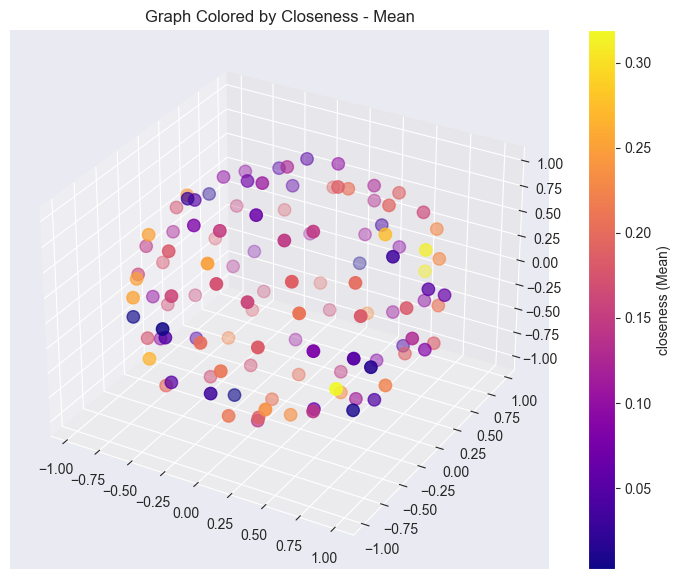

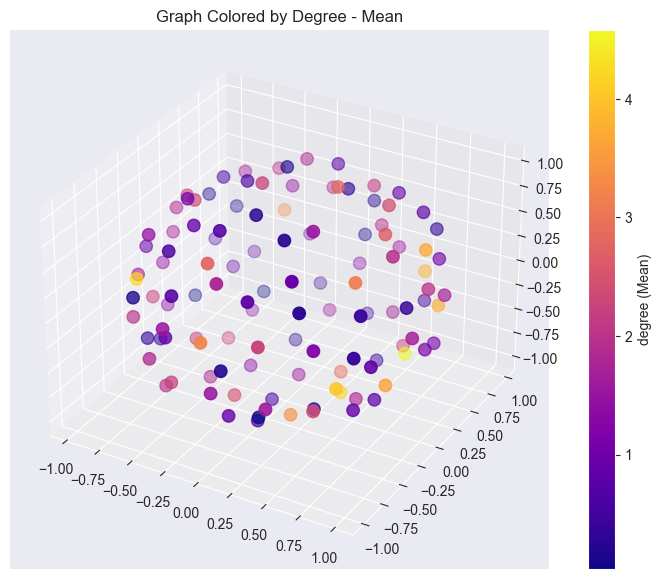

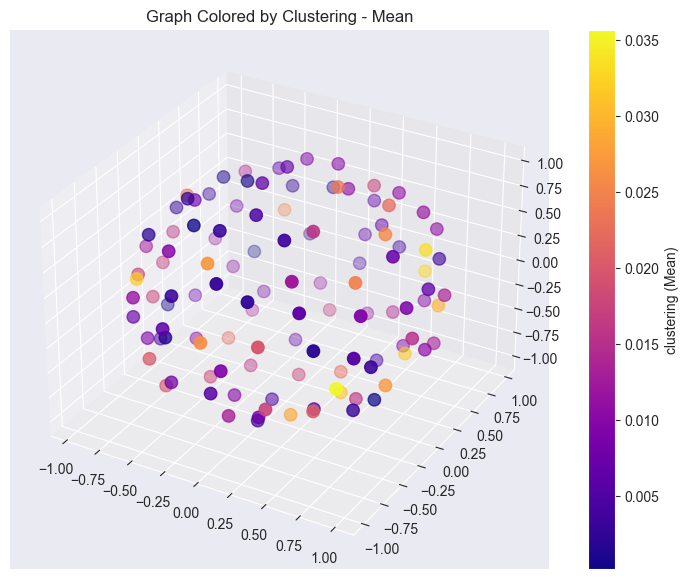

Graph with real values


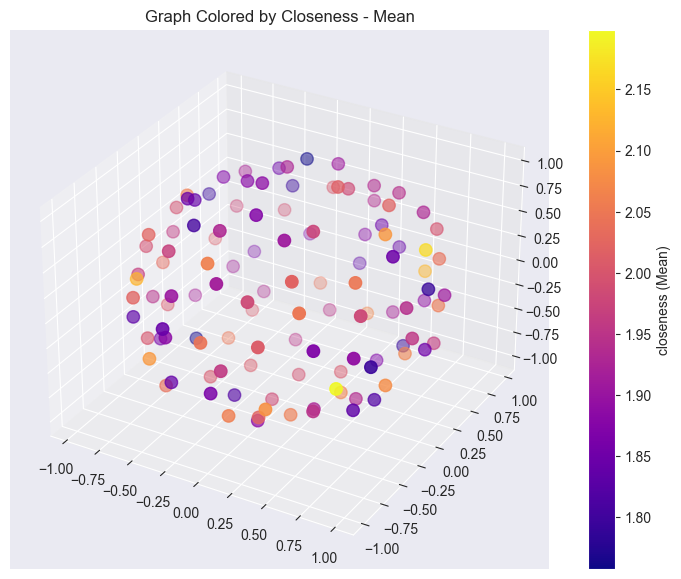

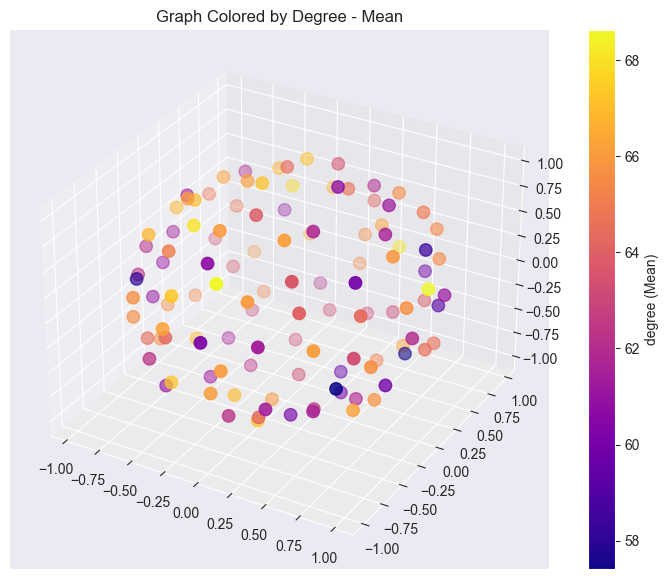

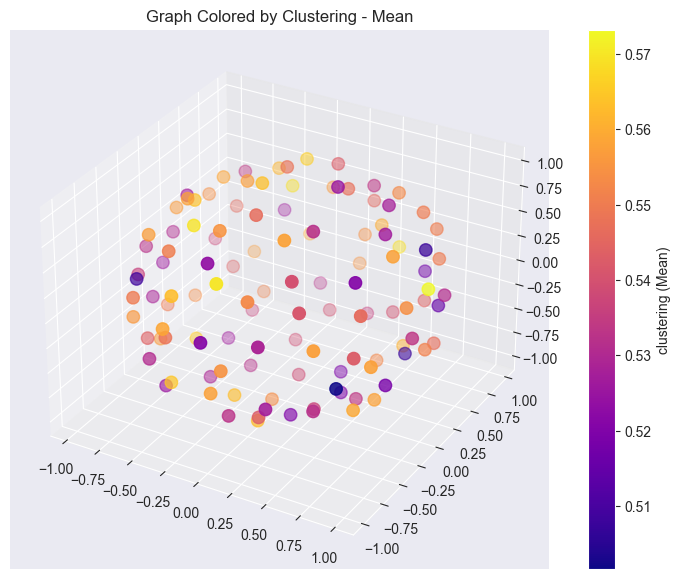

In [4]:
print("Graph of differences")
file_path = '../computing/analysis/ppmi/60_70/comparison/swedd/node_differences.csv'
metrics_to_plot = ['closeness', 'degree', 'clustering']  # Le metriche che vuoi visualizzare
statistics_to_plot = ['Mean']   # Le statistiche che vuoi visualizzare

# Visualizza il grafo con i parametri selezionati
visualize_graph_from_file(file_path, metrics_to_plot, statistics_to_plot)

print("Graph with real values")
file_path = '../computing/dataset/ppmi/60_70/swedd/stats/node_statistics.csv'
metrics_to_plot = ['closeness', 'degree', 'clustering']  # Le metriche che vuoi visualizzare
statistics_to_plot = ['Mean',]   # Le statistiche che vuoi visualizzare

# Visualizza il grafo con i parametri selezionati
visualize_graph_from_file(file_path, metrics_to_plot, statistics_to_plot)